In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.distributions.normal_mixture_distribution import NormalMixture
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(np.array([1/3, 2/3]), 
                                      np.array([-2., 2.]), np.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

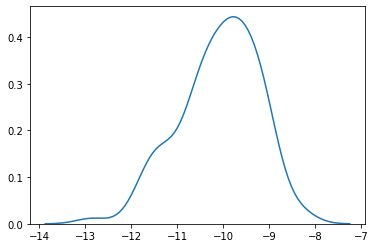

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.0682: 100%|██████████| 1500/1500 [00:05<00:00, 281.25it/s]


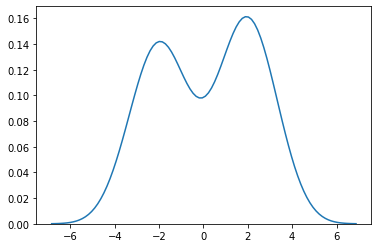

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([-2.186335  , -1.3792058 ,  2.0708432 , -1.5837581 ,
              0.71452856, -3.6741648 , -3.3327713 , -3.72129   ,
             -0.20878692, -3.160884  , -1.7601814 , -3.3384457 ,
              0.9500819 ,  1.5335913 ,  1.1736908 ,  2.9918857 ,
             -1.4921188 ,  3.0180023 ,  0.52800566, -0.5604427 ,
             -2.037213  , -1.9143517 ,  1.6027541 ,  1.7625649 ,
             -2.3766716 ,  3.1300566 , -0.4788437 ,  4.2422004 ,
              3.3259356 ,  3.7851017 ,  1.4095575 ,  1.8601607 ,
             -2.3160925 ,  2.7006292 ,  1.5295596 ,  2.3317294 ,
              2.7454455 ,  1.9435799 ,  1.9887137 , -1.7838622 ,
              2.1848228 , -2.3269706 , -1.4022971 ,  2.4604018 ,
             -1.0054877 ,  2.6603642 , -2.8313723 ,  1.2675362 ,
              1.7049706 ,  3.275061  , -2.0523164 , -0.90636754,
             -3.0260813 ,  1.7738725 , -2.5543065 ,  1.2096798 ,
              1.4093056 ,  2.4818068 , -2.3272526 ,  1.6385176 ,
             -4.20733   ,

In [9]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.LinearKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.2426: 100%|██████████| 1500/1500 [00:02<00:00, 506.20it/s]


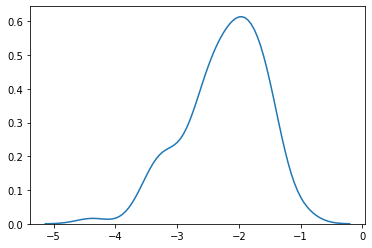

In [10]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [11]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RandomFeatureKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations * 2)

SVGD 2.1783: 100%|██████████| 3000/3000 [00:21<00:00, 139.47it/s]


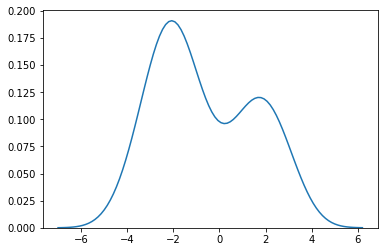

In [12]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [13]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.IMQKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.094: 100%|██████████| 1500/1500 [00:03<00:00, 442.17it/s]


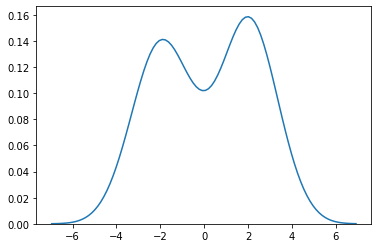

In [14]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [15]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.MixtureKernel([0.5, 0.5], [kernels.LinearKernel(), kernels.RandomFeatureKernel()]), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.3427: 100%|██████████| 1500/1500 [00:12<00:00, 120.68it/s]


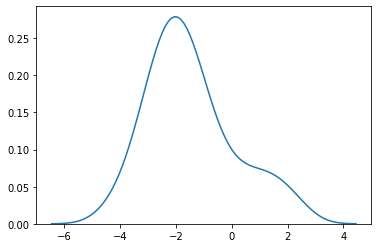

In [16]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])